In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_archie = pd.read_csv('data_archie_17-18.csv')

In [5]:
print 'Total data = {}'.format(len(data_archie))

Total data = 755252


In [7]:
# Checking column names
data_archie.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755252 entries, 0 to 755251
Data columns (total 18 columns):
transaction_id        755252 non-null int64
created_at            755252 non-null object
updated_at            755252 non-null object
user_id               755226 non-null float64
cluster               755226 non-null object
partner_name          755226 non-null object
fullname              755223 non-null object
customer_number       755252 non-null object
longitude             31110 non-null float64
latitude              31110 non-null float64
operator              755252 non-null object
product_id            755252 non-null int64
product_name          755252 non-null object
product_value         755252 non-null int64
cur_purchase_price    755252 non-null float64
cur_sell_price        755050 non-null float64
status                755252 non-null object
source                38109 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 103.7+ MB


## Data Cleaning

In [8]:
# Checking transaction status
data_archie['status'].unique()

array(['success', 'failed', 'refunded', 'mkios_new', 'canceled', 'cancel',
       'failed_payment', 'refund', 'new', 'paid'], dtype=object)

In [9]:
#Remove failed transaction from dataframe 
status = ['failed', 'refunded', 'canceled', 'cancel', 'refund', 'failed_payment', 'new']

for i in status:
    data_archie = data_archie[data_archie['status'] != i]

In [10]:
data_archie['status'].unique()

array(['success', 'mkios_new', 'paid'], dtype=object)

In [11]:
print len(data_archie)

730754


In [13]:
# Checking null value
data_archie.isnull().sum()

transaction_id             0
created_at                 0
updated_at                 0
user_id                   25
cluster                   25
partner_name              25
fullname                  28
customer_number            0
longitude             701922
latitude              701922
operator                   0
product_id                 0
product_name               0
product_value              0
cur_purchase_price         0
cur_sell_price           140
status                     0
source                695177
dtype: int64

In [14]:
# Drop unnecessary cols
data_archie = data_archie.drop(['fullname','longitude','latitude','source'] , 1)

In [15]:
data_archie.head(5)

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
0,1267873,2017-12-10 20:45:51.000000,2017-12-10 20:46:08.000000,24081.0,Banyumas,Lapak Kita,26452811385,Smartfren,34,Smartfren 10.000,10000,10175.0,10225.0,success
1,1267889,2017-12-10 20:45:57.000000,2017-12-10 20:55:06.000000,416.0,Indragiri,Lapak Kita,255814472019,Telkomsel,293,Telkomsel 10.000,10000,9850.0,9900.0,success
2,1267897,2017-12-10 20:46:04.000000,2017-12-10 20:55:13.000000,22658.0,Indragiri,Lapak Kita,256120681743,Telkomsel,294,Telkomsel 20.000,20000,19700.0,19800.0,success
3,1267919,2017-12-10 20:46:12.000000,2017-12-10 20:55:20.000000,24130.0,Indragiri,Lapak Kita,247159394775,Telkomsel,293,Telkomsel 10.000,10000,9850.0,9900.0,success
4,1267928,2017-12-10 20:46:24.000000,2017-12-10 20:55:27.000000,24111.0,Indragiri,Lapak Kita,247153630911,Telkomsel,295,Telkomsel 25.000,25000,24625.0,24750.0,success


In [16]:
# Checking null value
data_archie.isnull().sum()

transaction_id          0
created_at              0
updated_at              0
user_id                25
cluster                25
partner_name           25
customer_number         0
operator                0
product_id              0
product_name            0
product_value           0
cur_purchase_price      0
cur_sell_price        140
status                  0
dtype: int64

### user_id

In [19]:
data_archie.loc[data_archie['user_id'].isnull()].head(5)
#data_archie[data_archie['user_id'].isnull()]

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
5495,7823,2017-10-19 21:14:30.000000,2017-10-19 21:14:30.000000,NaN,NaN,NaN,243834992280,T-Sel MKIOS,202,MKIOS Reguler 10000,10000,10000.0,10000.0,mkios_new
6087,9016,2017-10-23 19:13:43.000000,2017-10-23 19:14:09.000000,NaN,NaN,NaN,135031878969,PLN Prepaid,429,"PLN Prepaid Rp 50,000",50000,0.0,0.0,success
26884,6085,2017-10-17 17:54:44.000000,2017-10-17 17:55:07.000000,NaN,NaN,NaN,135027052602,PLN Prepaid,430,"PLN Prepaid Rp 100,000",100000,0.0,0.0,success
37172,9046,2017-10-23 20:36:10.000000,2017-10-23 20:37:08.000000,NaN,NaN,NaN,135097350216,PLN Prepaid,187,"PLN Prepaid Rp 20,000",20000,0.0,0.0,success
41750,6701,2017-10-29 21:51:43.000000,2017-10-29 21:51:51.000000,NaN,NaN,NaN,243837310839,Telkomsel,425,Telkomsel Rp 20.000,20000,19900.0,19900.0,success


In [20]:
# Remove 'user_id = Null' from dataframe 
data_archie = data_archie[data_archie['user_id'].notnull()]

In [22]:
# Change user_id  data type from float to integer
data_archie.user_id = (data_archie['user_id']).astype(int)

In [23]:
print len(data_archie)

730729


### cur_sell_price

In [25]:
data_archie.loc[data_archie['cur_sell_price'].isnull()].head(5)

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
11621,1281071,2017-12-12 08:59:00.000000,2017-12-12 08:59:05.000000,3513,Cilacap,Lapak Kita,251534541093,Axis,13,Axis 200.000,200000,0.0,NaN,success
58105,705052,2017-07-05 13:05:02.000000,2017-07-05 13:05:09.000000,2417,Tegal,Lapak Kita,251532607257,Axis,13,Axis 200.000,200000,0.0,NaN,success
61383,703201,2017-07-05 12:16:38.000000,2017-07-05 12:17:07.000000,2417,Tegal,Lapak Kita,251532607248,Axis,13,Axis 200.000,200000,0.0,NaN,success
62567,1339994,2017-12-23 12:13:36.000000,2017-12-23 12:14:08.000000,4179,Cilacap,Lapak Kita,251534325141,Axis,13,Axis 200.000,200000,0.0,NaN,success
63720,707163,2017-07-05 14:02:56.000000,2017-07-05 14:03:07.000000,2417,Tegal,Lapak Kita,251532607215,Axis,13,Axis 200.000,200000,0.0,NaN,success


In [26]:
# Drop the rows with cur_sell_price = null
data_archie = data_archie[data_archie['cur_sell_price'].notnull()]

In [27]:
data_archie.isnull().sum()

transaction_id        0
created_at            0
updated_at            0
user_id               0
cluster               0
partner_name          0
customer_number       0
operator              0
product_id            0
product_name          0
product_value         0
cur_purchase_price    0
cur_sell_price        0
status                0
dtype: int64

In [32]:
# Checking minimum value of cur_sell_price
print data_archie['cur_sell_price'].min()
print (data_archie['cur_sell_price'] == 0.0).sum()

0.0
11796


In [33]:
data_archie[data_archie['cur_sell_price'] == 0.0].head()

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
19,1268058,2017-12-10 20:48:32.000000,2017-12-10 20:48:32.000000,24128,Indragiri,Lapak Kita,255835076388,T-Sel MKIOS,202,MKIOS Reguler 10000,10000,0.0,0.0,mkios_new
241,10117,2017-11-01 00:23:45.000000,2017-11-01 00:23:45.000000,16565,Batam,Golden Technology,247161197601,T-Sel MKIOS,206,MKIOS Reguler 20000,20000,0.0,0.0,mkios_new
274,1268119,2017-12-10 18:57:38.000000,2017-12-10 18:57:38.000000,24240,Banyumas,Lapak Kita,243680107839,T-Sel MKIOS,206,MKIOS Reguler 20000,20000,0.0,0.0,mkios_new
283,10119,2017-11-01 00:25:18.000000,2017-11-01 00:25:18.000000,16429,Batam,Golden Technology,255816851505,T-Sel MKIOS,199,MKIOS Reguler 5000,5000,0.0,0.0,mkios_new
284,10121,2017-11-01 00:27:27.000000,2017-11-01 00:27:27.000000,16103,Batam,Golden Technology,244087850073,T-Sel MKIOS,217,MKIOS Data 100000,100000,0.0,0.0,mkios_new


In [35]:
# Drop the rows with cur_sell_price = 0.0
data_archie = data_archie[data_archie.cur_sell_price != 0.0]

(data_archie['cur_sell_price'] == 0.0).sum()

0

In [37]:
#(data_archie['cur_purchase_price'] == 0.0).sum()
#data_archie = data_archie[data_archie.cur_purchase_price != 0.0]

In [38]:
# New dataframe
df2 = data_archie.copy()

In [39]:
print 'Total new data = {}'.format(len(data_archie))

Total new data = 718793


## Exploratory Data

In [40]:
# Checking cols' names
data_archie.columns.values

array(['transaction_id', 'created_at', 'updated_at', 'user_id', 'cluster',
       'partner_name', 'customer_number', 'operator', 'product_id',
       'product_name', 'product_value', 'cur_purchase_price',
       'cur_sell_price', 'status'], dtype=object)

In [41]:
# Change created_at and updated_at data types to datetime
data_archie.created_at = pd.to_datetime(data_archie['created_at']).dt.date
data_archie.updated_at = pd.to_datetime(data_archie['updated_at']).dt.date
data_archie.created_at.head(5)

0    2017-12-10
1    2017-12-10
2    2017-12-10
3    2017-12-10
4    2017-12-10
Name: created_at, dtype: object

### Note: Harga cur_sell_price dari sebuah product_name  itu berbeda sesuai cluster dan partner 

In [33]:
#(data_archie.loc[data_archie['cur_sell_price'] == 0.0])['product_name'].unique()
#(data_archie.loc[data_archie['cur_sell_price'].isnull()])['product_name'].unique()
#data_archie.loc[(data_archie['product_name'] == 'Axis 200.000') & (data_archie['cur_sell_price'].notnull())]
#(data_archie['product_name'] == 'XL 300.000') & (data_archie['cur_sell_price'].notnull())).sum()

#((data_archie['product_name'] == 'XL 30.000') & (data_archie['cur_sell_price'].notnull())).sum()
#(data_archie.loc[data_archie['cur_sell_price'].isnull()])['partner_name'].unique()
#data_archie.loc[(data_archie['product_name'] == 'XL 30.000') & (data_archie['cur_sell_price'].isnull())].head()
#data_archie.loc[(data_archie['cluster'] == 'Cilacap') & (data_archie['partner_name'] == 'Lapak Kita') & (data_archie['product_name'] == 'XL 30.000') & (data_archie['cur_sell_price'].notnull())]

#data_archie['cur_sell_price'] = data_archie.groupby(['cluster', 'partner_name', 'product_name'], sort=False)['cur_sell_price'].apply(lambda x: x.ffill().bfill())
#data_archie[''] = data_archie.set_index(['cluster', 'partner_name', 'product_name']).cur_sell_price.fillna(data_archie.set_index(['cluster', 'partner_name', 'product_name']).cur_sell_price).reset_index()

In [47]:
# Count the profit for every transaction
# Save the result to new column 'margin_val'
#data_archie['margin_val'] =   data_archie['cur_sell_price'] - data_archie['cur_purchase_price']

In [48]:
#data_archie['margin_val'].min()

In [49]:
#(data_archie.loc[data_archie['margin_val'] < 0]).head()

In [50]:
#(data_archie['margin_val'] < 0).sum()

In [35]:
#df = df[df['margin_val'] > 0]
#(df['margin_val'] < 0).sum()

In [42]:
data_archie.head()

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
0,1267873,2017-12-10,2017-12-10,24081,Banyumas,Lapak Kita,26452811385,Smartfren,34,Smartfren 10.000,10000,10175.0,10225.0,success
1,1267889,2017-12-10,2017-12-10,416,Indragiri,Lapak Kita,255814472019,Telkomsel,293,Telkomsel 10.000,10000,9850.0,9900.0,success
2,1267897,2017-12-10,2017-12-10,22658,Indragiri,Lapak Kita,256120681743,Telkomsel,294,Telkomsel 20.000,20000,19700.0,19800.0,success
3,1267919,2017-12-10,2017-12-10,24130,Indragiri,Lapak Kita,247159394775,Telkomsel,293,Telkomsel 10.000,10000,9850.0,9900.0,success
4,1267928,2017-12-10,2017-12-10,24111,Indragiri,Lapak Kita,247153630911,Telkomsel,295,Telkomsel 25.000,25000,24625.0,24750.0,success


In [43]:
# Group the dataframe by user_id
aggs = {}
aggs['transaction_id'] = 'count'
aggs['created_at'] = ['min', 'max']
aggs['customer_number'] = 'nunique'
aggs['cur_sell_price'] = 'sum'
#aggs['margin_val'] = 'sum'
#aggs['partner_name'] = lambda x:x.iloc[0]

df = data_archie.groupby('user_id', as_index=False).agg(aggs)

print aggs

{'created_at': ['min', 'max'], 'cur_sell_price': 'sum', 'transaction_id': 'count', 'customer_number': 'nunique'}


In [44]:
# New columns' name
# first_trx : first date of purchase per unique user_id 
# last_trx : latest date of purchase per unique user_id 
# monetary : total amount of purchase per unique user_id 
# frequency  : total purchase per unique user_id 
# total_cust : total customer per unique user_id (unique value of customer_number )

df.columns = ['user_id', 'first_trx', 'last_trx', 'monetary', 'frequency', 'total_cust']

In [45]:
df.head(5)

,user_id,first_trx,last_trx,monetary,frequency,total_cust
0,17,2017-08-14,2017-11-22,760508.0,52,22
1,59,2017-07-01,2017-07-01,9900.0,1,1
2,60,2017-07-01,2017-07-15,840525.0,71,58
3,61,2017-07-12,2017-12-20,6524400.0,98,79
4,63,2017-08-11,2017-11-02,61650.0,6,3


In [46]:
# Checking the result
data_archie.loc[data_archie['user_id'] == 63]

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
219,35269,2017-08-22,2017-08-31,63,Cirebon,Jawa Pos,263355140451,XL,170,XL 5.000,5000,5000.0,5000.0,success
3313,1079845,2017-11-01,2017-11-01,63,Cirebon,Jawa Pos,263355140451,XL,170,XL 5.000,5000,5650.0,5675.0,success
24128,1083548,2017-11-02,2017-11-02,63,Cirebon,Jawa Pos,3342518331,PLN Prepaid,187,"PLN Prepaid Rp 20,000",20000,20050.0,20150.0,success
47952,1087137,2017-11-02,2017-11-02,63,Cirebon,Jawa Pos,263355140451,XL,170,XL 5.000,5000,5650.0,5675.0,success
411827,35265,2017-08-11,2017-08-11,63,Cirebon,Jawa Pos,263355140451,XL,170,XL 5.000,5000,5000.0,5000.0,success
412021,35266,2017-08-11,2017-09-25,63,Cirebon,Jawa Pos,3342518331,PLN Prepaid,187,"PLN Prepaid Rp 20,000",20000,20050.0,20150.0,success


In [47]:
(data_archie.loc[data_archie['user_id']== 63])['customer_number'].unique()

array([263355140451, 3342518331, '263355140451'], dtype=object)

In [48]:
df.last_trx.max()

datetime.date(2017, 12, 31)

In [49]:
import datetime as dt

# Assign 'now' as max date
now = dt.date(2018,1,1)

In [50]:
# Checking the recency for every user
# recency is measurement of the time elapsed since the last purchase was made by a customer
df['recency'] = (now - df['last_trx']).dt.days

In [51]:
# How long the costumer using our system
# {last_trx - first puchase}
df['join_days'] = ((df['last_trx'] + dt.timedelta(days=1)) - df['first_trx'] ).dt.days

# active days : how many days do users actively purchase?
df['active_days'] = data_archie.groupby('user_id', as_index=False)['created_at'].nunique()

In [52]:
df.head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days
0,17,2017-08-14,2017-11-22,760508.0,52,22,40,101,35
1,59,2017-07-01,2017-07-01,9900.0,1,1,184,1,1
2,60,2017-07-01,2017-07-15,840525.0,71,58,170,15,15
3,61,2017-07-12,2017-12-20,6524400.0,98,79,12,162,56
4,63,2017-08-11,2017-11-02,61650.0,6,3,60,84,4


In [53]:
# Assign new cols to dataframe
# avg_trx : average transaction per active_day
# avg_monetary_trx : average monetary per transaction 
# avg_monetary_day : average monetary per active_day

df['avg_trx'] = (df['frequency']/df['active_days']).astype(int)
df['avg_monetary_trx'] = (df['monetary']/df['frequency']).astype(int)
df['avg_monetary_day'] = (df['monetary']/df['active_days']).astype(int)

In [54]:
df.head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day
0,17,2017-08-14,2017-11-22,760508.0,52,22,40,101,35,1,14625,21728
1,59,2017-07-01,2017-07-01,9900.0,1,1,184,1,1,1,9900,9900
2,60,2017-07-01,2017-07-15,840525.0,71,58,170,15,15,4,11838,56035
3,61,2017-07-12,2017-12-20,6524400.0,98,79,12,162,56,1,66575,116507
4,63,2017-08-11,2017-11-02,61650.0,6,3,60,84,4,1,10275,15412


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df.columns.get_values().tolist()

['user_id',
 'first_trx',
 'last_trx',
 'monetary',
 'frequency',
 'total_cust',
 'recency',
 'join_days',
 'active_days',
 'avg_trx',
 'avg_monetary_trx',
 'avg_monetary_day']

In [57]:
x = ['monetary','frequency','total_cust','recency','active_days','join_days','avg_trx','avg_monetary_trx','avg_monetary_day']
data = df[x]

print data.info(verbose = True)
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4965 entries, 0 to 4964
Data columns (total 9 columns):
monetary            4965 non-null float64
frequency           4965 non-null int64
total_cust          4965 non-null int64
recency             4965 non-null int64
active_days         4965 non-null int64
join_days           4965 non-null int64
avg_trx             4965 non-null int64
avg_monetary_trx    4965 non-null int64
avg_monetary_day    4965 non-null int64
dtypes: float64(1), int64(8)
memory usage: 387.9 KB
None


,monetary,frequency,total_cust,recency,active_days,join_days,avg_trx,avg_monetary_trx,avg_monetary_day
0,760508.0,52,22,40,35,101,1,14625,21728
1,9900.0,1,1,184,1,1,1,9900,9900
2,840525.0,71,58,170,15,15,4,11838,56035
3,6524400.0,98,79,12,56,162,1,66575,116507
4,61650.0,6,3,60,4,84,1,10275,15412


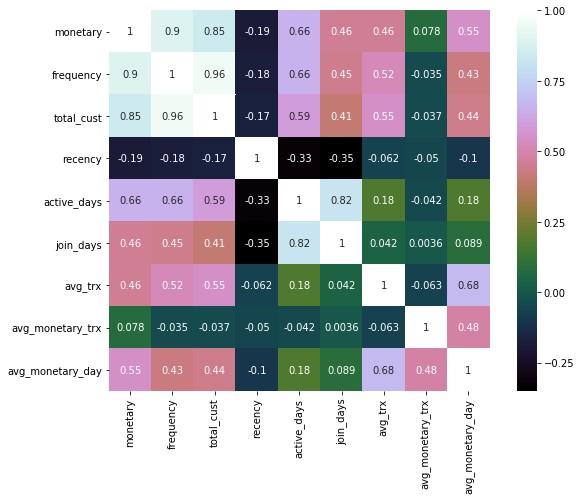

In [58]:
# Correlation heatmap in dataset
# Positive correlation (+1.00): If one variable increases the other also increases and when one variable decreases the other also decreases
# Negative correlation (-1.00) : If one variable increases as the other decreases, and vice versa.
# 0.00 indicates no correlation between two variables 

correlation = data.corr()
plt.figure(figsize=(10, 7))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [59]:
# Findings:
# - monetary has positive corr with total_profit, total_cust and frequency, means that we don't need to keep/use all of them
# - also have same corr value toward others variable 
# - recency has negative corr towards others, means might be good features

In [79]:
print data['active_days'].max()

184


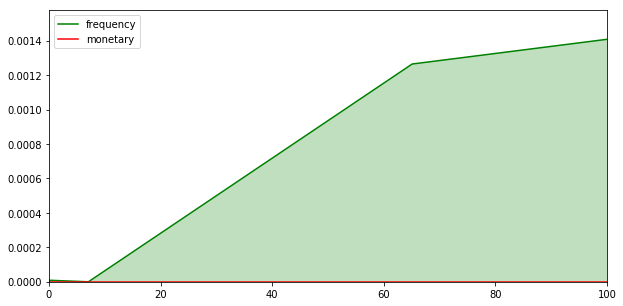

In [97]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data["frequency"], color="green", shade=True)
sns.kdeplot(data["monetary"], color="red", shade=True)
plt.xlim(0,100)
plt.show()

## Predictions

### 1. Scoreboard - RFM

In [100]:
features = ['recency', 'monetary', 'frequency']

In [101]:
quantiles = df[features].quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'frequency': {0.25: 10.0, 0.5: 38.0, 0.75: 131.0},
 'monetary': {0.25: 209400.0, 0.5: 822100.0, 0.75: 3069875.0},
 'recency': {0.25: 1.0, 0.5: 9.0, 0.75: 53.0}}

In [102]:
df[features].describe()

,recency,monetary,frequency
count,4965.000000,4.965000e+03,4965.000000
mean,35.813696,3.681457e+06,144.772004
std,48.749716,9.477556e+06,364.421408
min,1.000000,2.110000e+03,1.000000
25%,1.000000,2.094000e+05,10.000000
50%,9.000000,8.221000e+05,38.000000
75%,53.000000,3.069875e+06,131.000000
max,184.000000,1.698545e+08,7266.000000


In [103]:
# Assign points to variables
# Recency = Good user has lesser recency
def LowValue(x,p,quantiles):
    if x <= quantiles[p][0.25]:
        return 4
    elif x <= quantiles[p][0.50]:
        return 3
    elif x <= quantiles[p][0.75]: 
        return 2
    else:
        return 1

In [104]:
# Good user has higher frequency, monetary, total_profit, total_cust
def HighValue(x,p,quantiles):
    if x <= quantiles[p][0.25]:
        return 1
    elif x <= quantiles[p][0.50]:
        return 2
    elif x <= quantiles[p][0.75]: 
        return 3
    else:
        return 4

In [105]:
df['R'] = df['recency'].apply(LowValue, args=('recency',quantiles,))
df['F'] = df['frequency'].apply(HighValue, args=('frequency',quantiles,))
df['M'] = df['monetary'].apply(HighValue, args=('monetary',quantiles,))
#df['P'] = df['total_profit'].apply(HighValue, args=('total_profit',quantiles,))
#df['C'] = df['total_cust'].apply(HighValue, args=('total_cust',quantiles,))
#df['J'] = df['join_days'].apply(HighValue, args=('join_days',quantiles,))

In [106]:
df['RFM_score'] = df.R + df.F + df.M 

In [107]:
df.head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score
0,17,2017-08-14,2017-11-22,760508.0,52,22,40,101,35,1,14625,21728,2,3,2,7
1,59,2017-07-01,2017-07-01,9900.0,1,1,184,1,1,1,9900,9900,1,1,1,3
2,60,2017-07-01,2017-07-15,840525.0,71,58,170,15,15,4,11838,56035,1,3,3,7
3,61,2017-07-12,2017-12-20,6524400.0,98,79,12,162,56,1,66575,116507,2,3,4,9
4,63,2017-08-11,2017-11-02,61650.0,6,3,60,84,4,1,10275,15412,1,1,1,3


In [108]:
# Scorepoints range is from 3 - 12 points 
(df[df['RFM_score'] == 12]).head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score
54,241,2017-07-05,2017-12-31,3804850.0,176,85,1,180,94,1,21618,40477,4,4,4,12
61,251,2017-07-06,2017-12-31,3651850.0,142,95,1,179,69,2,25717,52925,4,4,4,12
70,276,2017-07-02,2017-12-31,7553500.0,179,129,1,183,68,2,42198,111080,4,4,4,12
80,299,2017-09-18,2017-12-31,10231350.0,175,92,1,105,80,2,58464,127891,4,4,4,12
83,304,2017-09-18,2017-12-31,3549700.0,285,107,1,105,76,3,12455,46706,4,4,4,12


In [109]:
(df[df['RFM_score'] == 9]).head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score
3,61,2017-07-12,2017-12-20,6524400.0,98,79,12,162,56,1,66575,116507,2,3,4,9
13,85,2017-07-02,2017-12-28,1360150.0,40,13,4,180,28,1,34003,48576,3,3,3,9
14,86,2017-07-03,2017-09-26,5284600.0,169,112,97,86,49,3,31269,107848,1,4,4,9
39,191,2017-07-08,2017-12-28,2132400.0,75,55,4,174,46,1,28432,46356,3,3,3,9
46,206,2017-07-01,2017-11-17,2586000.0,134,78,45,140,55,2,19298,47018,2,4,3,9


In [110]:
#(df_final[df_final['R'] == 10]).head()
#(df_final[df_final['Scorepoints'] == 150]).head()

In [111]:
# Labelling the user
def label_cust(row):
    if row['RFM_score'] > 10:
        label = 'Good'
    elif row['RFM_score'] > 8 and row['recency'] < 21 :
        label = 'Good'
    else:
        label = 'Bad'
    return label

df['rfm_class'] = df.apply(label_cust, axis=1)

In [112]:
df.head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score,rfm_class
0,17,2017-08-14,2017-11-22,760508.0,52,22,40,101,35,1,14625,21728,2,3,2,7,Bad
1,59,2017-07-01,2017-07-01,9900.0,1,1,184,1,1,1,9900,9900,1,1,1,3,Bad
2,60,2017-07-01,2017-07-15,840525.0,71,58,170,15,15,4,11838,56035,1,3,3,7,Bad
3,61,2017-07-12,2017-12-20,6524400.0,98,79,12,162,56,1,66575,116507,2,3,4,9,Good
4,63,2017-08-11,2017-11-02,61650.0,6,3,60,84,4,1,10275,15412,1,1,1,3,Bad


In [113]:
# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max']
aggs['frequency'] = ['min', 'max']
aggs['recency'] = ['min', 'max']
aggs['user_id'] = 'count'

df.groupby('rfm_class').agg(aggs)

user_id frequency       recency       monetary             
            count       min   max     min  max       min          max
rfm_class                                                            
Bad          3199         1  2591       1  184    2110.0   47416664.0
Good         1766        13  7266       1   20  292890.0  169854530.0

In [119]:
# Checking user in Bad class
df[(df['recency'] == 1) & (df['rfm_class'] == 'Bad')].head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score,rfm_class
75,288,2017-12-30,2017-12-31,602700.0,18,17,1,2,2,9,33483,301350,4,2,2,8,Bad
412,830,2017-12-17,2017-12-31,523220.0,8,8,1,15,6,1,65402,87203,4,1,2,7,Bad
938,1763,2017-12-11,2017-12-31,529350.0,27,21,1,21,12,2,19605,44112,4,2,2,8,Bad
1121,1976,2017-09-28,2017-12-31,319700.0,14,10,1,95,13,1,22835,24592,4,2,2,8,Bad
1139,1997,2017-09-20,2017-12-31,297200.0,23,16,1,103,20,1,12921,14860,4,2,2,8,Bad


In [120]:
df[(df['monetary'] == 47416664.0) & (df['rfm_class'] == 'Bad')].head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score,rfm_class
409,824,2017-08-26,2017-10-19,47416664.0,2591,1462,74,55,52,49,18300,911858,1,4,4,9,Bad


In [121]:
# Checking user in good class
df[(df['frequency'] == 13) & (df['rfm_class'] == 'Good')]

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score,rfm_class
4344,24096,2017-12-22,2017-12-30,3271950.0,13,13,2,9,5,2,251688,654390,3,2,4,9,Good


## 2. K-Means & RFM

In [122]:
df[features].describe()

,recency,monetary,frequency
count,4965.000000,4.965000e+03,4965.000000
mean,35.813696,3.681457e+06,144.772004
std,48.749716,9.477556e+06,364.421408
min,1.000000,2.110000e+03,1.000000
25%,1.000000,2.094000e+05,10.000000
50%,9.000000,8.221000e+05,38.000000
75%,53.000000,3.069875e+06,131.000000
max,184.000000,1.698545e+08,7266.000000


In [123]:
X = df[features]
X = X.values
X

array([[4.00000e+01, 7.60508e+05, 5.20000e+01],
       [1.84000e+02, 9.90000e+03, 1.00000e+00],
       [1.70000e+02, 8.40525e+05, 7.10000e+01],
       ...,
       [1.00000e+00, 4.92500e+03, 1.00000e+00],
       [1.00000e+00, 5.10000e+04, 3.00000e+00],
       [1.00000e+00, 7.95500e+04, 2.00000e+00]])

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

cluster_range = range (1,10)
cluster_errors = []

for cluster in cluster_range:
    kmeans = KMeans(cluster)
    kmeans.fit(X_scale)
    cluster_errors.append(kmeans.inertia_ )

Text(0,0.5,'cluster errors')

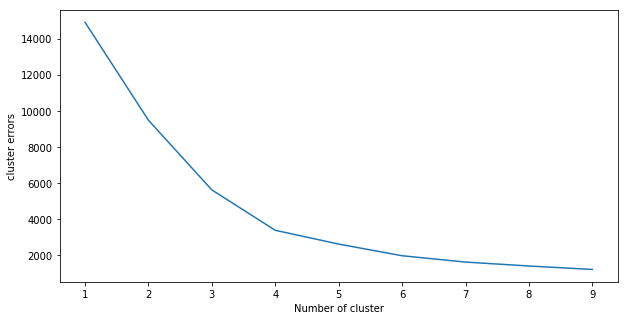

In [125]:
df_cluster = pd.DataFrame({"cluster" : cluster_range, "cluster_error" : cluster_errors})

plt.figure(figsize=(10,5))
plt.plot(df_cluster.cluster, df_cluster.cluster_error)
plt.xlabel('Number of cluster')
plt.ylabel('cluster errors')

In [153]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X_scale)
labels = kmeans.predict(X_scale)
centroids = kmeans.cluster_centers_

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}
label_color = []
for label in labels:
    label_color.append(color_map[label])

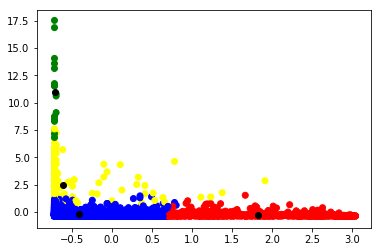

In [154]:
plt.scatter(X_scale[:,0],X_scale[:,1], c=label_color)  
plt.scatter(centroids[:,0] ,centroids[:,1], color='black') 

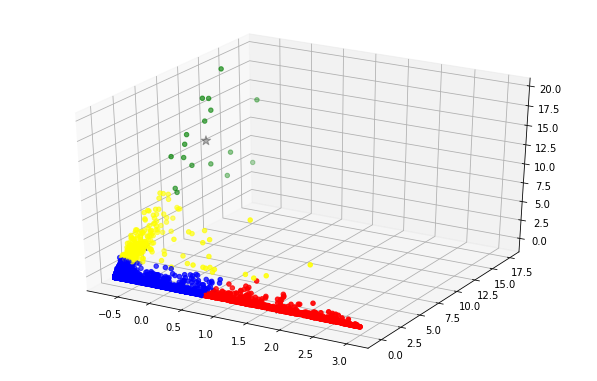

In [155]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X_scale[:, 0], X_scale[:, 1], X_scale[:, 2], c=label_color)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='black', s=100)

In [139]:
#fig = plt.figure(figsize=(10,5)) 
#ax = fig.add_subplot(111, projection='3d') 
#ax.set_xlim3d(0, 5)
#ax.set_ylim3d(-2, 3)
#ax.set_zlim3d(0, 5)
#ax.set_xlabel(features[0])
#ax.scatter(X_scale[:,0],X_scale[:,1],X_scale[:,2], c=label_color) 
#ax.scatter(centroids[:,0] ,centroids[:,1], centroids[:,2], color='black')

In [156]:
pd.DataFrame(pd.Series(labels).value_counts(), columns = ['number of customers']).T

,1,0,3,2
number of customers,3723,940,285,17


In [157]:
df['rfm_cluster'] = labels

In [158]:
df[df['rfm_cluster'] == 0].head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score,rfm_class,rfm_cluster
1,59,2017-07-01,2017-07-01,9900.0,1,1,184,1,1,1,9900,9900,1,1,1,3,Bad,0
2,60,2017-07-01,2017-07-15,840525.0,71,58,170,15,15,4,11838,56035,1,3,3,7,Bad,0
5,65,2017-07-01,2017-07-31,2592200.0,64,55,154,31,22,2,40503,117827,1,3,3,7,Bad,0
6,66,2017-07-16,2017-08-05,439050.0,26,23,149,21,13,2,16886,33773,1,2,2,5,Bad,0
7,69,2017-07-17,2017-08-08,111241.0,9,9,146,23,3,3,12360,37080,1,1,1,3,Bad,0


In [159]:
df[df['rfm_cluster'] == 1].head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score,rfm_class,rfm_cluster
0,17,2017-08-14,2017-11-22,760508.0,52,22,40,101,35,1,14625,21728,2,3,2,7,Bad,1
3,61,2017-07-12,2017-12-20,6524400.0,98,79,12,162,56,1,66575,116507,2,3,4,9,Good,1
4,63,2017-08-11,2017-11-02,61650.0,6,3,60,84,4,1,10275,15412,1,1,1,3,Bad,1
13,85,2017-07-02,2017-12-28,1360150.0,40,13,4,180,28,1,34003,48576,3,3,3,9,Good,1
15,87,2017-11-08,2017-12-30,4451870.0,98,80,2,53,28,3,45427,158995,3,3,4,10,Good,1


In [160]:
df[df['rfm_cluster'] == 2].head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score,rfm_class,rfm_cluster
222,553,2017-07-01,2017-12-31,73263917.0,2497,1045,1,184,184,13,29340,398173,4,4,4,12,Good,2
493,1000,2017-07-01,2017-12-31,128102186.0,7266,3680,1,184,183,39,17630,700011,4,4,4,12,Good,2
504,1016,2017-07-01,2017-12-30,104204578.0,6360,3348,2,183,178,35,16384,585418,3,4,4,11,Good,2
514,1033,2017-07-01,2017-12-31,163545440.0,2061,619,1,184,183,11,79352,893690,4,4,4,12,Good,2
541,1099,2017-07-01,2017-12-31,113232409.0,3036,1046,1,184,170,17,37296,666072,4,4,4,12,Good,2


In [223]:
# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max', 'mean']
aggs['frequency'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['user_id'] = 'count'

df.groupby('rfm_cluster').agg(aggs)

user_id frequency                    recency                   \
              count       min   max         mean     min  max        mean   
rfm_cluster                                                                 
0               940         1   864    46.073404      70  184  124.635106   
1              3723         1   822    88.908407       1   75   15.821649   
2                17      2061  7266  4265.176471       1    2    1.176471   
3               285        55  2878   954.280702       1  129    6.084211   

               monetary                             
                    min          max          mean  
rfm_cluster                                         
0                2110.0   18030375.0  9.487228e+05  
1                4925.0   19964438.0  2.141905e+06  
2            68127651.0  169854530.0  1.080730e+08  
3             8849145.0   75606075.0  2.657923e+07

Findings:
- cluster 0: lost customer, they haven't purchase for more than 70 days.
- cluster 2: the best customer based on their RFM value, lowest recency with high frequency and monetary

## 3. K-Means - feature2

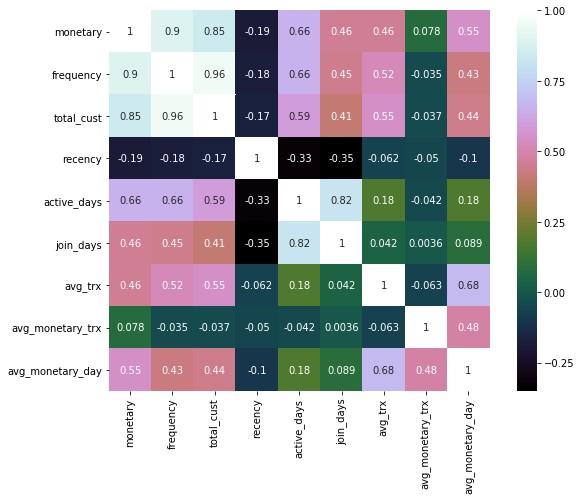

In [162]:
correlation = data.corr()  
plt.figure(figsize=(10, 7))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [203]:
features2 = ['recency', 'frequency', 'monetary', 'active_days', 'avg_monetary_day']

In [204]:
ft2 = df[features2]
ft2 = ft2.values

scaler = StandardScaler()
ft2_scale = scaler.fit_transform(ft2)

cluster_range = range (1,10)
cluster_errors = []

for cluster in cluster_range:
    clusters = KMeans(cluster)
    clusters.fit(ft2_scale)
    cluster_errors.append(clusters.inertia_ )

df2_cluster = pd.DataFrame({"cluster" : cluster_range, "cluster_error" : cluster_errors})

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0,0.5,'cluster errors')

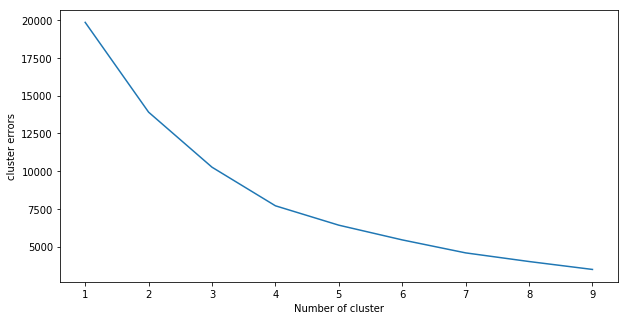

In [205]:
plt.figure(figsize=(10,5))
plt.plot(df2_cluster.cluster, df2_cluster.cluster_error)
plt.xlabel('Number of cluster')
plt.ylabel('cluster errors')

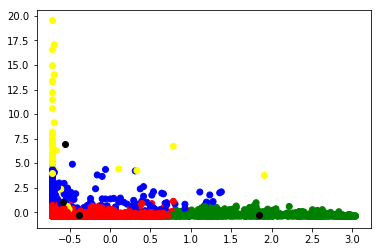

In [206]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(ft2_scale)
labels2 = kmeans.predict(ft2_scale)
centers = kmeans.cluster_centers_

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple'}
labels2_color = []
for label in labels2:
    labels2_color.append(color_map[label])

plt.scatter(ft2_scale[:,0],ft2_scale[:,1], c=labels2_color)  
plt.scatter(centers[:,0] ,centers[:,1], color='black') 

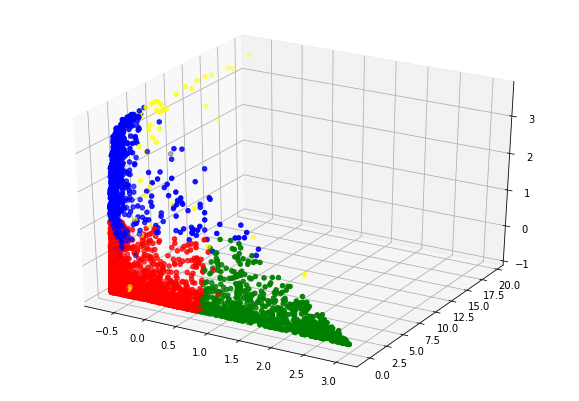

In [207]:
fig = plt.figure(figsize=(10,7)) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(ft2_scale[:,0],ft2_scale[:,1],ft2_scale[:,2], c=labels2_color) 
ax.scatter(centers[:,0] ,centers[:,1], centers[:,2], color='black')

In [208]:
df['kmeans_cluster'] = labels2

In [222]:
# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max', 'mean']
aggs['frequency'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['avg_trx'] = ['min', 'max']
aggs['active_days'] = ['min', 'max']
aggs['user_id'] = 'count'

df.groupby('kmeans_cluster').agg(aggs)

active_days      user_id   monetary                             \
                       min  max   count        min          max          mean   
kmeans_cluster                                                                  
0                        1   82    3312     4925.0   13795916.0  1.430189e+06   
1                       30  184     691  1485800.0   67381169.0  1.395653e+07   
2                        1   85     917     2110.0   18030375.0  8.784744e+05   
3                        4  184      45  5961575.0  169854530.0  6.871383e+07   

               frequency                    recency                  avg_trx  \
                     min   max         mean     min  max        mean     min   
kmeans_cluster                                                                 
0                      1   577    58.656099       1   82   17.240640       1   
1                    127  2030   527.173661       1  103    7.166425       1   
2                      1   497    42.653217      69  184  125.816794       1   
3                     55  7266  2691.866667       1  129    8.622222       4   

                    
               max  
kmeans_cluster      
0               96  
1               35  
2               25  
3               72

### -----------------------------------------------------------------------------------------------------------------

In [215]:
features3 = ['recency', 'avg_monetary_trx', 'active_days']

ft3 = df[features3]
ft3 = ft3.values

scaler = StandardScaler()
ft3_scale = scaler.fit_transform(ft3)

cluster_range = range (1,10)
cluster_errors = []

for cluster in cluster_range:
    clusters = KMeans(cluster)
    clusters.fit(ft3_scale)
    cluster_errors.append(clusters.inertia_ )

df3_cluster = pd.DataFrame({"cluster" : cluster_range, "cluster_error" : cluster_errors})

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0,0.5,'cluster errors')

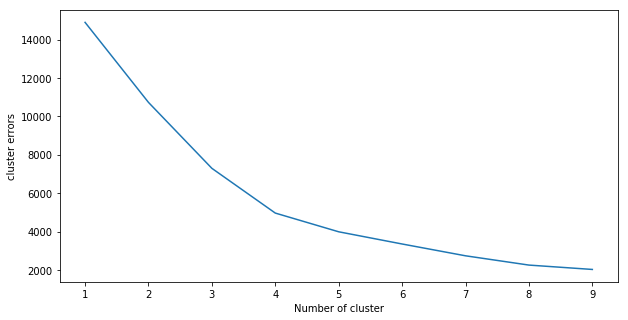

In [216]:
plt.figure(figsize=(10,5))
plt.plot(df3_cluster.cluster, df3_cluster.cluster_error)
plt.xlabel('Number of cluster')
plt.ylabel('cluster errors')

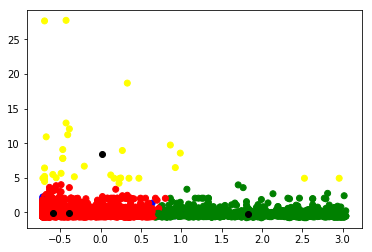

In [217]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(ft3_scale)
labels3 = kmeans.predict(ft3_scale)
centers = kmeans.cluster_centers_

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}
labels3_color = []
for label in labels3:
    labels3_color.append(color_map[label])

plt.scatter(ft3_scale[:,0],ft3_scale[:,1], c=labels3_color)  
plt.scatter(centers[:,0] ,centers[:,1], color='black') 

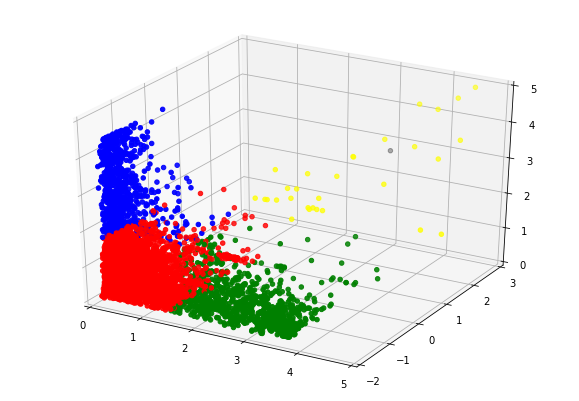

In [218]:
fig = plt.figure(figsize=(10,7)) 
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlim3d(0, 5)
ax.set_ylim3d(-2, 3)
ax.set_zlim3d(0, 5)
ax.scatter(ft3_scale[:,0],ft3_scale[:,1],ft3_scale[:,2], c=labels3_color) 
ax.scatter(centers[:,0] ,centers[:,1], centers[:,2], color='black')

In [221]:
df['kmeans_cluster_2'] = labels3

# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max', 'mean']
aggs['frequency'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['user_id'] = 'count'

df.groupby('kmeans_cluster_2').agg(aggs)

user_id frequency                   recency                   \
                   count       min   max        mean     min  max        mean   
kmeans_cluster_2                                                                
0                   3270         1  3122   67.581651       1   75   16.911315   
1                    732        93  7266  613.153005       1   90    6.833333   
2                    930         1  2591   52.379570      69  184  125.053763   
3                     33         1    65    7.878788       1  180   36.757576   

                  monetary                             
                       min          max          mean  
kmeans_cluster_2                                       
0                   4925.0  136859752.0  1.661763e+06  
1                 949925.0  169854530.0  1.605356e+07  
2                   2110.0   47416664.0  1.061870e+06  
3                 197973.0   54416767.0  3.203758e+06

## 4. K-means & Outlier

In [272]:
df_new =  df.copy()

In [273]:
print 'Total data = {}'.format(len(df_new))

Total data = 4965


In [274]:
df_new.head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score,rfm_class,rfm_cluster,kmeans_cluster,kmeans_cluster_2
0,17,2017-08-14,2017-11-22,760508.0,52,22,40,101,35,1,14625,21728,2,3,2,7,Bad,1,0,0
1,59,2017-07-01,2017-07-01,9900.0,1,1,184,1,1,1,9900,9900,1,1,1,3,Bad,0,2,2
2,60,2017-07-01,2017-07-15,840525.0,71,58,170,15,15,4,11838,56035,1,3,3,7,Bad,0,2,2
3,61,2017-07-12,2017-12-20,6524400.0,98,79,12,162,56,1,66575,116507,2,3,4,9,Good,1,0,0
4,63,2017-08-11,2017-11-02,61650.0,6,3,60,84,4,1,10275,15412,1,1,1,3,Bad,1,0,0


In [275]:
df_cols = ['monetary', 'frequency', 'total_cust', 'recency', 'active_days', 'join_days', 'avg_trx', 'avg_monetary_trx', 'avg_monetary_day']
dt_new = df_new[df_cols]

In [276]:
dt_new.describe()

,monetary,frequency,total_cust,recency,active_days,join_days,avg_trx,avg_monetary_trx,avg_monetary_day
count,4.965000e+03,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4.965000e+03
mean,3.681457e+06,144.772004,80.600403,35.813696,34.287613,62.535549,2.788520,28527.816717,8.061150e+04
std,9.477556e+06,364.421408,198.816006,48.749716,41.690944,57.949621,4.322419,34729.473610,1.232147e+05
min,2.110000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1607.000000,2.110000e+03
25%,2.094000e+05,10.000000,8.000000,1.000000,6.000000,15.000000,1.000000,14230.000000,3.025500e+04
50%,8.221000e+05,38.000000,25.000000,9.000000,18.000000,46.000000,2.000000,21073.000000,5.048500e+04
75%,3.069875e+06,131.000000,76.000000,53.000000,46.000000,91.000000,3.000000,32750.000000,9.266200e+04
max,1.698545e+08,7266.000000,4119.000000,184.000000,184.000000,184.000000,96.000000,992276.000000,4.185905e+06


### Outlier Detection

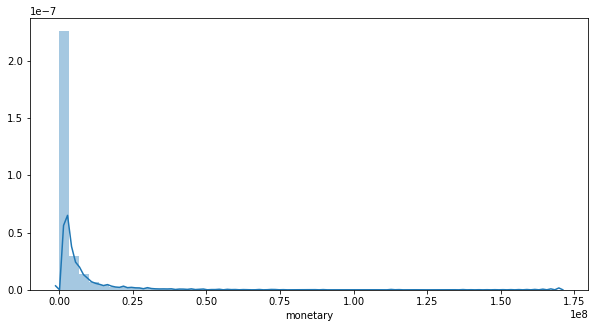

In [277]:
plt.figure(figsize=(10,5))
sns.distplot(df_new['monetary']);
plt.show()

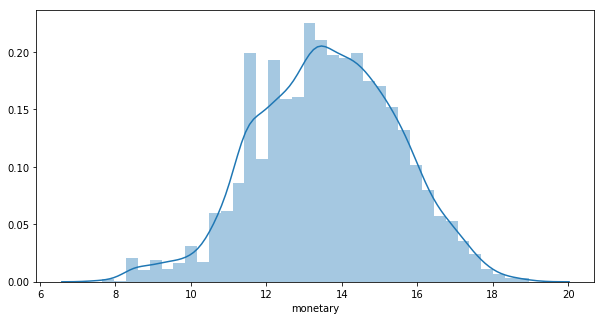

In [278]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(df['monetary']));
plt.show()

In [279]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print(col+' : ' +str(outlier_count[col]))
        
    return outlier_indices

outlier_indices = turkey_outlier_detector(dt_new)

monetary : 586
frequency : 565
total_cust : 559
recency : 413
active_days : 435
join_days : 0
avg_trx : 460
avg_monetary_trx : 306
avg_monetary_day : 372


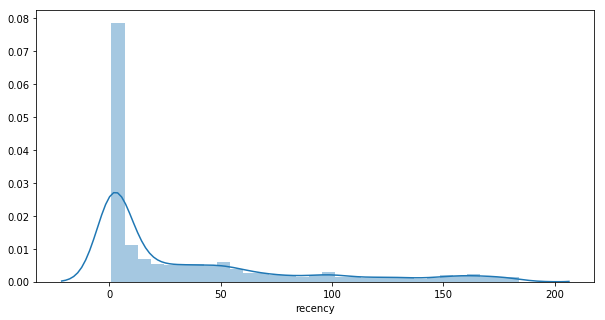

In [280]:
plt.figure(figsize=(10,5))
sns.distplot(df_new['recency']);
plt.show()

In [283]:
#df_new['unique_date'].value_counts()
df_new.loc[outlier_indices['recency']].head()

,user_id,first_trx,last_trx,monetary,frequency,total_cust,recency,join_days,active_days,avg_trx,avg_monetary_trx,avg_monetary_day,R,F,M,RFM_score,rfm_class,rfm_cluster,kmeans_cluster,kmeans_cluster_2
1,59,2017-07-01,2017-07-01,9900.0,1,1,184,1,1,1,9900,9900,1,1,1,3,Bad,0,2,2
2,60,2017-07-01,2017-07-15,840525.0,71,58,170,15,15,4,11838,56035,1,3,3,7,Bad,0,2,2
5,65,2017-07-01,2017-07-31,2592200.0,64,55,154,31,22,2,40503,117827,1,3,3,7,Bad,0,2,2
6,66,2017-07-16,2017-08-05,439050.0,26,23,149,21,13,2,16886,33773,1,2,2,5,Bad,0,2,2
7,69,2017-07-17,2017-08-08,111241.0,9,9,146,23,3,3,12360,37080,1,1,1,3,Bad,0,2,2


In [284]:
df_new.drop(outlier_indices['recency'], inplace=True)

In [285]:
print 'Total data = {}'.format(len(df_new))

Total data = 4552


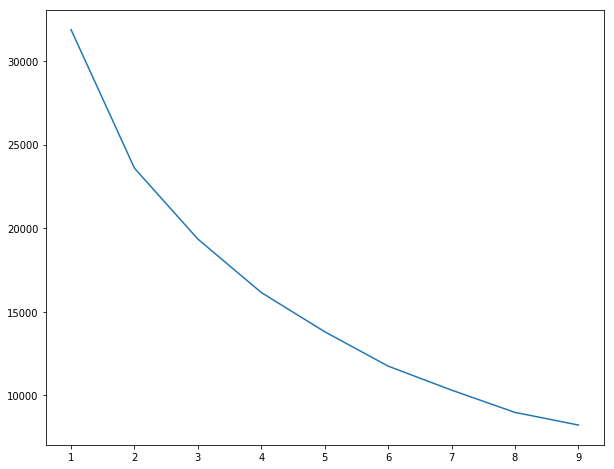

In [286]:
colss = ['monetary', 'frequency', 'recency', 'active_days','avg_trx', 'avg_monetary_trx', 'avg_monetary_day']
df4= df_new[colss]
df4 = df4.values

scaler = StandardScaler()
X = scaler.fit_transform(df4)
clusters = range(1,10)
inertias = []
for n in clusters:
    kmeans = KMeans(n)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertias);
plt.show()

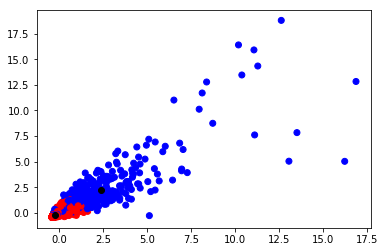

In [287]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
labels4 = kmeans.predict(X)
centers = kmeans.cluster_centers_

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow',  4: 'purple'}
labels4_color = []
for label in labels4:
    labels4_color.append(color_map[label])

plt.scatter(X[:,0],X[:,1], c=labels4_color)  
plt.scatter(centers[:,0] ,centers[:,1], color='black') 

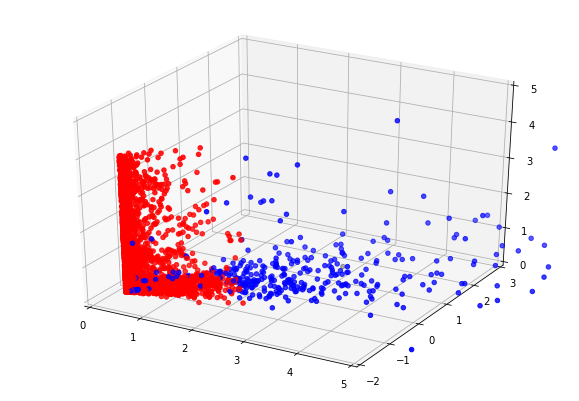

In [288]:
fig = plt.figure(figsize=(10,7)) 
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlim3d(0, 5)
ax.set_ylim3d(-2, 3)
ax.set_zlim3d(0, 5)
ax.scatter(X[:,0],X[:,1],X[:,2], c=labels4_color) 
ax.scatter(centers[:,0] ,centers[:,1], centers[:,2], color='black')

In [289]:
df_new['outlier_cluster'] = labels4

# Check the result
aggs = {}
aggs['monetary'] = ['min', 'max', 'mean']
aggs['frequency'] = ['min', 'max', 'mean']
aggs['recency'] = ['min', 'max', 'mean']
aggs['user_id'] = 'count'

df_new.groupby('outlier_cluster').agg(aggs)

user_id frequency                    recency                  \
                  count       min   max         mean     min  max       mean   
outlier_cluster                                                                
0                  4194         1   691    81.762279       1  130  26.190987   
1                   358         1  7266  1016.533520       1  129   6.614525   

                 monetary                             
                      min          max          mean  
outlier_cluster                                       
0                  2110.0   19964438.0  1.949689e+06  
1                619050.0  169854530.0  2.749815e+07